## Getting ready
We import the libraries and read the file

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import beta
import matplotlib.patches as mpatches

In [2]:
drinks = pd.read_csv("C:/Users/pablo/Documents/EdX/P4DS/Ejercicios/Final_Project/alcohol/drinks.csv")

### Inspecting the data
We ask for the main characteristics of each column
We also display the top 10 coutries in alcohol consuming for each kind of drink

In [3]:
drinks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
beer_servings,193.0,106.160622,101.143103,0.0,20.0,76.0,188.0,376.0
spirit_servings,193.0,80.994819,88.284312,0.0,4.0,56.0,128.0,438.0
wine_servings,193.0,49.450777,79.697598,0.0,1.0,8.0,59.0,370.0
total_litres_of_pure_alcohol,193.0,4.717098,3.773298,0.0,1.3,4.2,7.2,14.4


In [4]:
top_beer = drinks[['country', 'beer_servings']].sort_values('beer_servings', ascending = False).head(10)
top_beer

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


In [5]:
top_wine = drinks[['country', 'wine_servings']].sort_values('wine_servings', ascending = False).head(10)
top_wine

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278
156,Slovenia,276
99,Luxembourg,271
42,Croatia,254
83,Italy,237
55,Equatorial Guinea,233


In [7]:
top = drinks[['country', 'total_litres_of_pure_alcohol']].sort_values('total_litres_of_pure_alcohol', ascending = False).head(10)
top

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8
61,France,11.8
141,Russian Federation,11.5
81,Ireland,11.4
155,Slovakia,11.4
99,Luxembourg,11.4


### Adding the proportions
Apart from the quantity of wine they drink, we are also interested in the proportion compared to the other types of alcohol

In [14]:
drinks['beer_prop'] = beer/(beer+wine+spirit)
drinks['wine_prop'] = wine/(beer+wine+spirit)
drinks['spirit_prop'] = spirit/(beer+wine+spirit)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer_prop,wine_prop,spirit_prop
0,Afghanistan,0,0,0,0.0,NaN,NaN,NaN
1,Albania,89,132,54,4.9,0.323636,0.196364,0.480000
2,Algeria,25,0,14,0.7,0.641026,0.358974,0.000000
3,Andorra,245,138,312,12.4,0.352518,0.448921,0.198561
4,Angola,217,57,45,5.9,0.680251,0.141066,0.178683


In [15]:
drinks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
beer_servings,193.0,106.160622,101.143103,0.0,20.000000,76.000000,188.000000,376.000000
spirit_servings,193.0,80.994819,88.284312,0.0,4.000000,56.000000,128.000000,438.000000
wine_servings,193.0,49.450777,79.697598,0.0,1.000000,8.000000,59.000000,370.000000
total_litres_of_pure_alcohol,193.0,4.717098,3.773298,0.0,1.300000,4.200000,7.200000,14.400000
beer_prop,180.0,0.502724,0.244055,0.0,0.324447,0.476436,0.681841,1.000000
wine_prop,180.0,0.156371,0.171675,0.0,0.024107,0.087296,0.229142,0.716923
spirit_prop,180.0,0.340905,0.250222,0.0,0.144442,0.273001,0.521265,1.000000


### Cleaning data

In [29]:
drinks[['beer_prop', 'wine_prop', 'spirit_prop']].isna().any()

beer_prop      True
wine_prop      True
spirit_prop    True
dtype: bool

In [30]:
before_rows = drinks.shape[0]
before_rows

193

In [31]:
drinks = drinks.dropna()

In [33]:
after_rows = drinks.shape[0]
after_rows

180

We create a data that contains only the information we will use

In [35]:
interest = drinks[(drinks.country == 'Spain') | (drinks.country == 'France') | (drinks.country == 'Italy')]
interest

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer_prop,wine_prop,spirit_prop
61,France,127,151,370,11.8,0.195988,0.570988,0.233025
83,Italy,85,42,237,6.5,0.233516,0.651099,0.115385
160,Spain,284,157,112,10.0,0.513562,0.202532,0.283906


## Plot 1
We display the plot below to see the proportions observed in the dataset

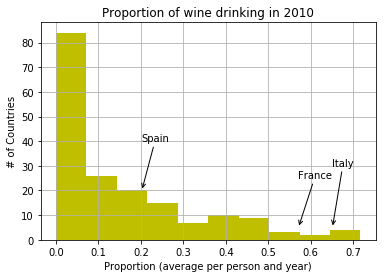

In [21]:
# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("Spain",
            xy=(0.202, 20), xycoords='data',
            xytext=(0.202, 40), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("Italy",
            xy=(0.651, 5), xycoords='data',
            xytext=(0.651, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate("France",
            xy=(0.571, 5), xycoords='data',
            xytext=(0.571, 25), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(drinks['wine_prop'], 10, normed=False, facecolor='y')

plt.xlabel('Proportion (average per person and year)')
plt.ylabel('# of Countries')
plt.title('Proportion of wine drinking in 2010')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

## Inferring a Binomial Probability
To apply Bayesian Parameter Estimation, we need to specify the prior distribution of the proportions. According to theory, we will use a beta prior distribution to estimate the binomial probability

In [19]:
# edit default plot settings
plt.rc('font', size=12)

In [51]:
z_Spain = 112 #Wine units in Spain
N_Spain = 553 #Total alcohol units observed in Spain 

z_France = 370 #Wine units in France
N_France = 648 #Total alcohol units observed in France

a_Italy = 237 #Wine units in Italy
b_Italy = 85+42 #Beer and spirit drinks in Italy
prop_Italy = a_Italy/(a_Italy+b_Italy)
prop_Italy

0.6510989010989011

We believe this proportion observed in Italy might be very similar to the real proportion in Spain. However, we want to give it the possibility to spread in case it's not, so we build an 'a' and a 'b' for Spain based on that population mean. k refers to the concentration of the distribution around the Italian proportion

In [106]:
k = 100
a_Spain = k*prop_Italy
b_Spain = (1-prop_Italy)*k

We are not very sure that France has the same habits as Italy does, so our previous beliefs will be quite vague.

In [96]:
a_France = 2
b_France = 2

# SPAIN

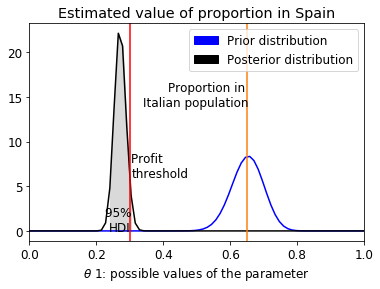

In [135]:
#A priori: prop Spain = prop Italy
# create grid of 80 points
x = np.linspace(0, 1, 80)
# freeze a beta prior distribution object with given parameters
dist = beta(a_Spain, b_Spain)
# probability density
pTheta_Sp = dist.pdf(x)

#Calculating the posterior distribution of proportion
aPost_Sp = a_Spain + z_Spain
bPost_Sp = b_Spain + N_Spain - z_Spain
distPost_Sp = beta(aPost_Sp, bPost_Sp)
pThetaPost_Sp = distPost_Sp.pdf(x)


#Plots
prior_Sp = plt.plot(x, pTheta_Sp, color = 'blue', label = 'prior distribution')
posterior_Sp = plt.plot(x, pThetaPost_Sp, color='k', label = 'post')


#
plt.axvline(prop_Italy, color='C1')
# annotate the line
plt.annotate(
    'Proportion in \nItalian population',
    (prop_Italy + 0.005, 14),
    ha='right')  # horizontalalignment


plt.axvline(0.3, color='red')
# annotate the line
plt.annotate(
    'Profit \nthreshold',
    (0.3 + 0.005, 6),
    ha='left')  # horizontalalignment



# find the points in x that are between 2.5% and 97.5% quantile
# dist.ppf is percent point function (inverse of cdf)
x_95_idx_Sp = (x > distPost_Sp.ppf(0.025)) & (x < distPost_Sp.ppf(0.975))
# shade the 95% central posterior interval
plt.fill_between(x[x_95_idx_Sp], pThetaPost_Sp[x_95_idx_Sp], color='0.85')
# add text into the shaded area
plt.text(distPost_Sp.median(), 0, "95% \nHDI", horizontalalignment='center')
# add labels and title
plt.xlabel(r'$\theta$ 1: possible values of the parameter')

#plt.legend((prior, posterior), ('prior', 'post'))
blue_patch = mpatches.Patch(color='blue', label='Prior distribution')
#plt.legend(handles=[blue_patch])
black_patch = mpatches.Patch(color='k', label='Posterior distribution')
plt.legend(handles=[blue_patch, black_patch], loc = 'upper right')
plt.title('Estimated value of proportion in Spain')

# scale x-axis tightly to the data.
plt.autoscale(axis='x', tight=True);


# FRANCE

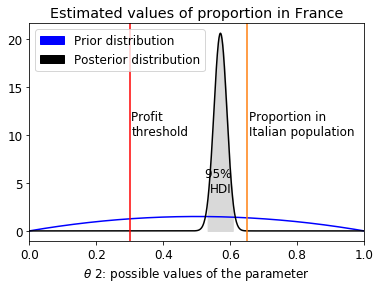

In [137]:

x = np.linspace(0, 1, 1000)
# freeze a beta distribution
dist = beta(a_France, b_France)

pTheta_Fr = dist.pdf(x)


aPost_Fr = a_France + z_France
bPost_Fr = b_France + N_France - z_France
distPost_Fr = beta(aPost_Fr, bPost_Fr)
pThetaPost_Fr = distPost_Fr.pdf(x)


#Gráficos
prior_Fr = plt.plot(x, pTheta_Fr, color = 'blue', label = 'prior distribution')
posterior_Fr = plt.plot(x, pThetaPost_Fr, color='k', label = 'post')

plt.axvline(prop_Italy, color='C1')
# annotate the line
plt.annotate(
    'Proportion in \nItalian population',
    (prop_Italy + 0.005, 10),
    ha='left')  # horizontalalignment


plt.axvline(0.3, color='red')
# annotate the line
plt.annotate(
    'Profit \nthreshold',
    (0.3 + 0.005, 10),
    ha='left')  # horizontalalignment


# find the points in x that are between 2.5% and 97.5% quantile
# dist.ppf is percent point function (inverse of cdf)
x_95_idx_Fr = (x > distPost_Fr.ppf(0.025)) & (x < distPost_Fr.ppf(0.975))
# shade the 95% central posterior interval
plt.fill_between(x[x_95_idx_Fr], pThetaPost_Fr[x_95_idx_Fr], color='0.85')

plt.text(distPost_Fr.median(), 4, "95% \nHDI", horizontalalignment='center')
# add labels and title
plt.xlabel(r'$\theta$ 2: possible values of the parameter')

#plt.legend((prior, posterior), ('prior', 'post'))
blue_patch = mpatches.Patch(color='blue', label='Prior distribution')
#plt.legend(handles=[blue_patch])
black_patch = mpatches.Patch(color='k', label='Posterior distribution')
plt.legend(handles=[blue_patch, black_patch], loc = 'upper left')
plt.title('Estimated values of proportion in France')

# scale x-axis tightly to the data.
plt.autoscale(axis='x', tight=True);

Let's obtain the HDI limits

In [133]:
IC_Fr = x[(x > distPost_Fr.ppf(0.025)) & (x < distPost_Fr.ppf(0.975))]
IC_Fr = [IC_Fr[0], IC_Fr[-1]]

IC_Sp = x[(x > distPost_Sp.ppf(0.025)) & (x < distPost_Sp.ppf(0.975))]
IC_Sp = [IC_Sp[0], IC_Sp[-1]]

IC = pd.DataFrame([IC_Fr, IC_Sp], columns = ['Low interval', 'High interval'], index = ['France', 'Spain'])
IC

,Low interval,High interval
France,0.544304,0.607595
Spain,0.240506,0.303797


## Building a classification model to predict future data

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [160]:
classif = drinks.copy()
classif['profit threshold'] = (classif['wine_prop'] > 0.3)*1
classif.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer_prop,wine_prop,spirit_prop,profit threshold
1,Albania,89,132,54,4.9,0.323636,0.196364,0.480000,0
2,Algeria,25,0,14,0.7,0.641026,0.358974,0.000000,1
3,Andorra,245,138,312,12.4,0.352518,0.448921,0.198561,1
4,Angola,217,57,45,5.9,0.680251,0.141066,0.178683,0
5,Antigua & Barbuda,102,128,45,4.9,0.370909,0.163636,0.465455,0


In [150]:
y = classif['profit threshold'].copy()

In [151]:
features = ['beer_servings']
x = classif[features].copy()

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=324)

In [153]:
fit = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
fit.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [154]:
pred = fit.predict(X_test)
pred[:5]

array([0, 0, 0, 0, 0])

In [155]:
a = accuracy_score(y_true = y_test, y_pred = pred)
a

0.7777777777777778

In [159]:
comparison = pd.DataFrame(y_test)
comparison['prediction'] = pred
comparison.head(10).transpose()

,136,142,143,12,144,112,9,141,114,110
profit threshold,1,0,0,0,0,0,1,0,1,0
prediction,0,0,0,0,0,0,0,0,0,0
